2026-01-03 07:22:29.793937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767424950.146790      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767424950.251010      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767424951.160969      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767424951.161026      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767424951.161030      55 computation_placer.cc:177] computation placer alr

TensorFlow: 2.19.0
GPUs: []
XLA: enabled
Mixed precision: disabled (no GPU) -> <DTypePolicy "float32">
Outputs will be saved to: /kaggle/working/vae_outputs_v3


2026-01-03 07:23:01.757725: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Train: (60000, 28, 28, 1) (60000,)
Test : (10000, 28, 28, 1) (10000,)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        320 │ encoder_input[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 14, 14,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 6272)      │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,605,888 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 256)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │      4,112 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │      4,112 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 16)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,707,680 (6.51 MB)

 Trainable params: 1,707,232 (6.51 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6272)           │       106,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,033 (797.00 KB)

 Trainable params: 203,841 (796.25 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 136s 556ms/step - beta: 0.1250 - gamma_sc: 1.0000 - kl_loss: 65.5078 - loss: 295.2281 - recon_loss: 282.0862 - supcon_loss: 4.9535 - val_beta: 0.1250 - val_gamma_sc: 1.0000 - val_kl_loss: 15.8384 - val_loss: 391.6529 - val_recon_loss: 384.8985 - val_supcon_loss: 4.7747 - learning_rate: 0.0010
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 133s 568ms/step - beta: 0.2500 - gamma_sc: 1.0000 - kl_loss: 34.7825 - loss: 250.0695 - recon_loss: 236.4903 - supcon_loss: 4.8835 - val_beta: 0.2500 - val_gamma_sc: 1.0000 - val_kl_loss: 25.9978 - val_loss: 273.8203 - val_recon_loss: 262.5230 - val_supcon_loss: 4.7979 - learning_rate: 0.0010
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 147s 591ms/step - beta: 0.3750 - gamma_sc: 1.0000 - kl_loss: 27.4973 - loss: 248.7090 - recon_loss: 233.4991 - supcon_loss: 4.8984 - val_beta: 0.3750 - val_gamma_sc: 1.0000 - val_kl_loss: 24.6508 - val_loss: 257.1148 - val_recon_loss: 243.0598 - val_supcon_loss: 4.8110 - learning_rate: 0.001

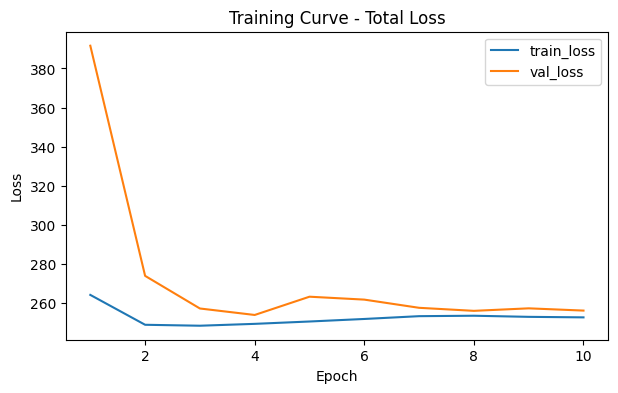

Saved: /kaggle/working/vae_outputs_v3/02_train_recon_loss.png


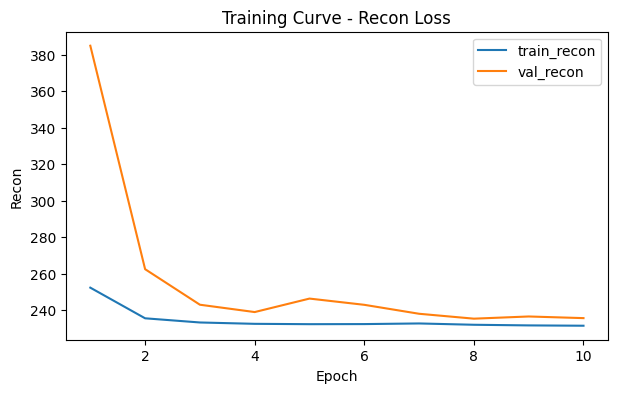

Saved: /kaggle/working/vae_outputs_v3/03_train_kl_loss.png


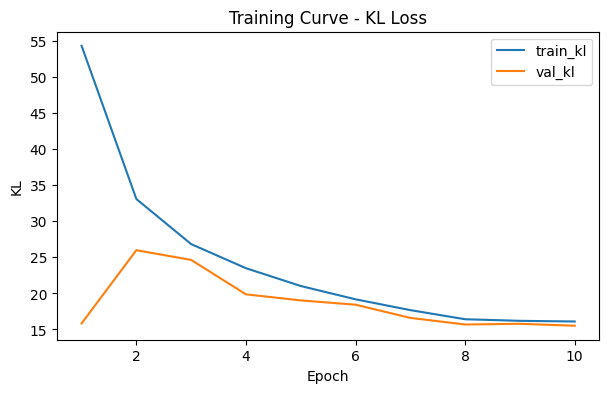

Saved: /kaggle/working/vae_outputs_v3/03B_train_supcon_loss.png


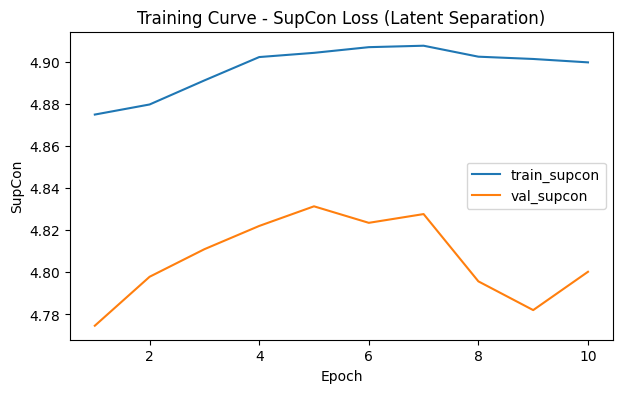

Saved: /kaggle/working/vae_outputs_v3/04_beta_warmup.png


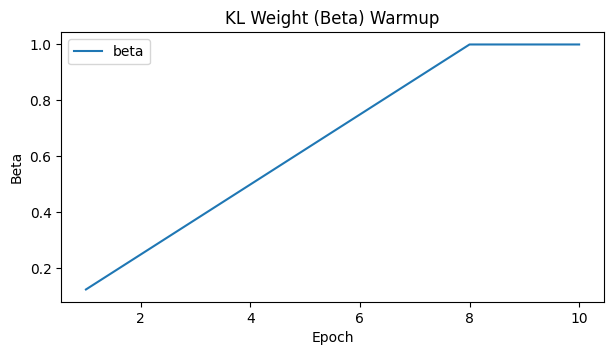

Saved: /kaggle/working/vae_outputs_v3/history.csv
Saved: /kaggle/working/vae_outputs_v3/05_denoising_grid.png


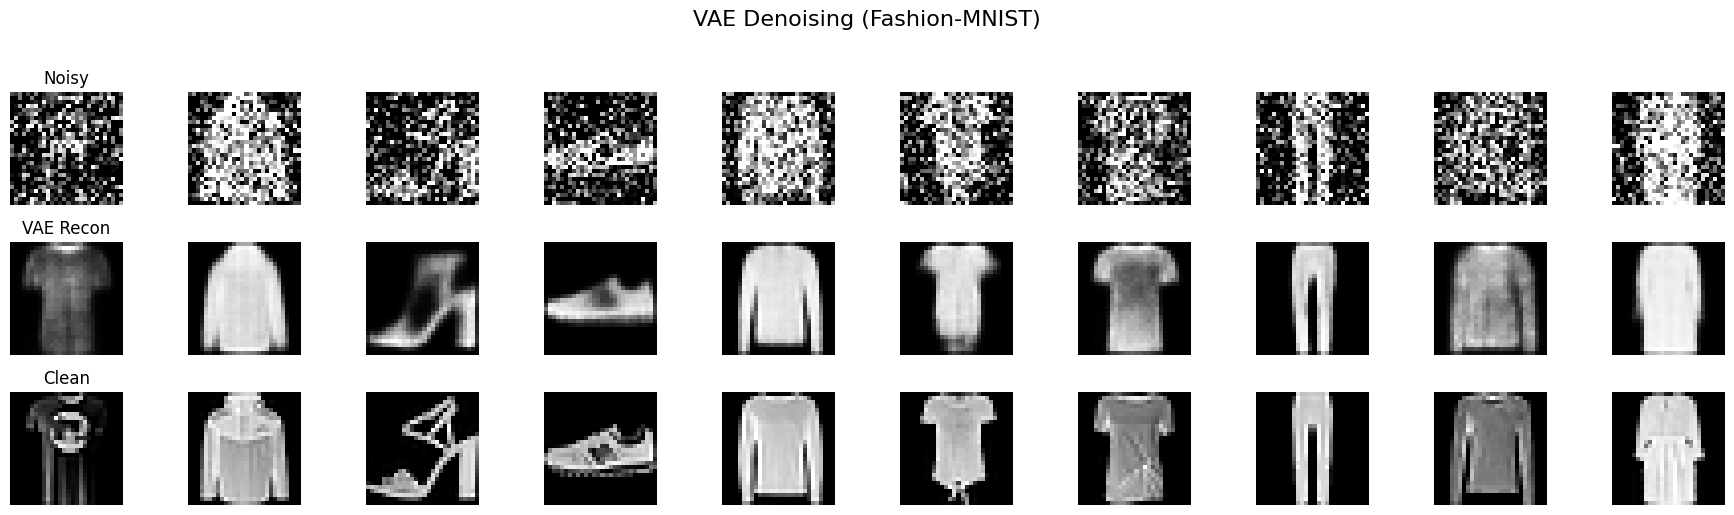


=== Denoising Metrics (Test) ===
NOISE_FACTOR=0.45 | LATENT_DIM=16 | BATCH=256 | EPOCHS=20
Baseline (Noisy->Clean)  MSE=0.101500 | PSNR=9.945 dB | SSIM=0.2871
VAE (Recon->Clean)       MSE=0.020262 | PSNR=17.422 dB | SSIM=0.5747

=== Improvement (Higher is better) ===
MSE improvement: 80.04% (↓)
PSNR gain      : 7.477 dB (↑)
SSIM gain      : 0.2876 (↑)
Saved: /kaggle/working/vae_outputs_v3/metrics.txt
Saved: /kaggle/working/vae_outputs_v3/metrics.csv
Saved: /kaggle/working/vae_outputs_v3/06A_latent_pca_numbers.png


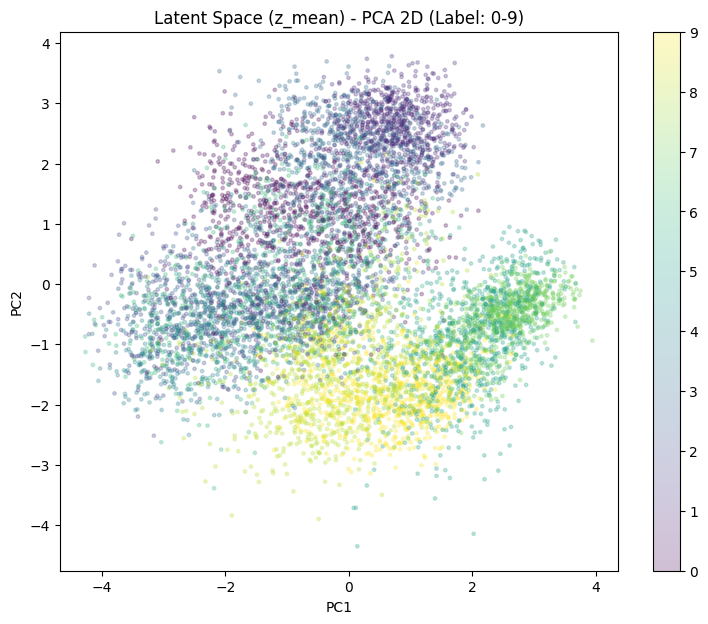

Saved: /kaggle/working/vae_outputs_v3/06B_latent_pca_text_tr.png


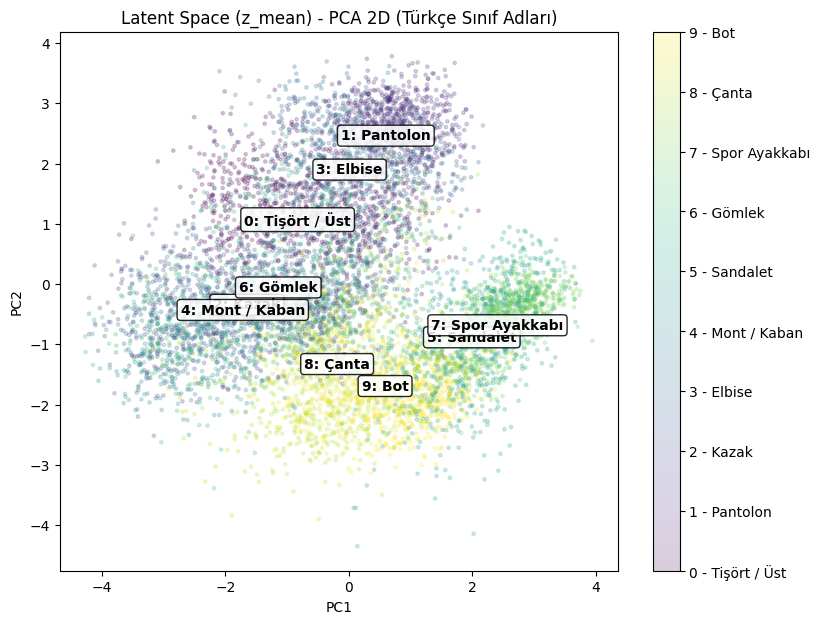

Saved: /kaggle/working/vae_outputs_v3/pca_explained_variance.txt


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: /kaggle/working/vae_outputs_v3/06C_latent_umap_text_tr.png


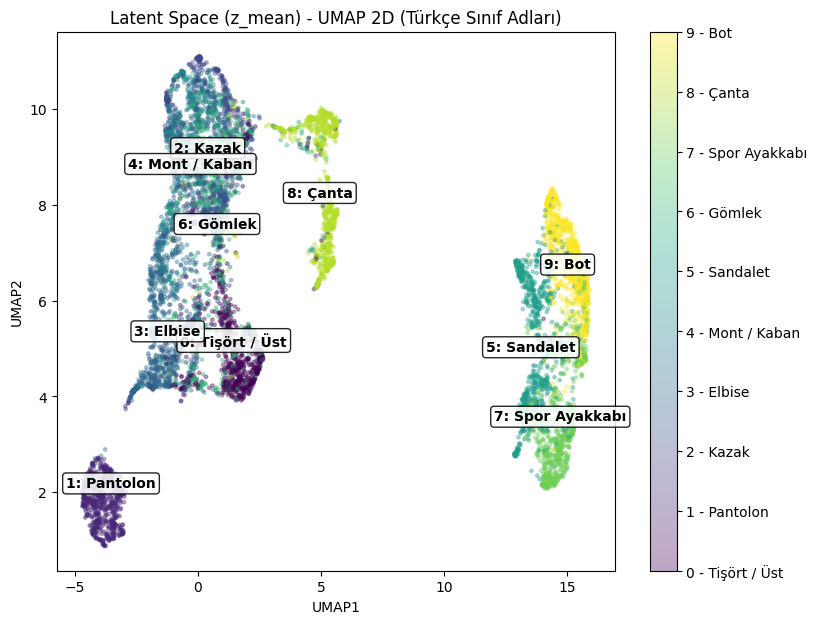

Saved: /kaggle/working/vae_outputs_v3/07_generated_prior.png


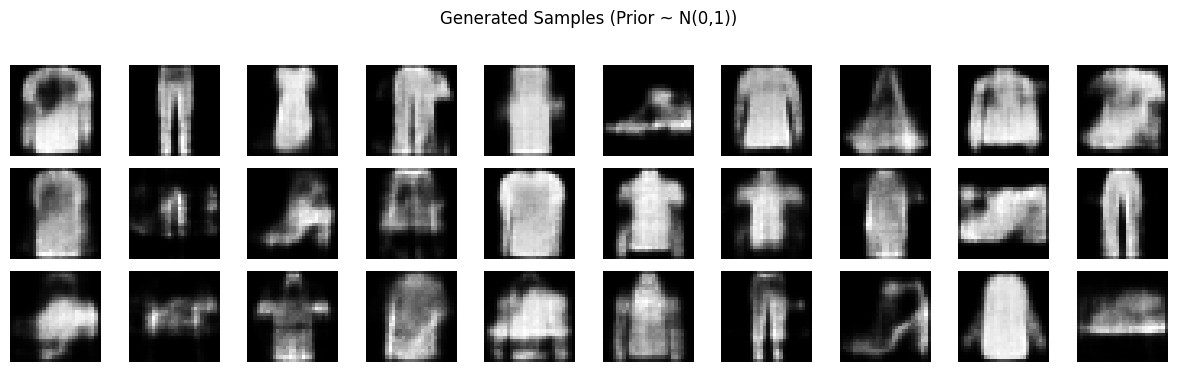

Saved: /kaggle/working/vae_outputs_v3/08_latent_interpolation.png


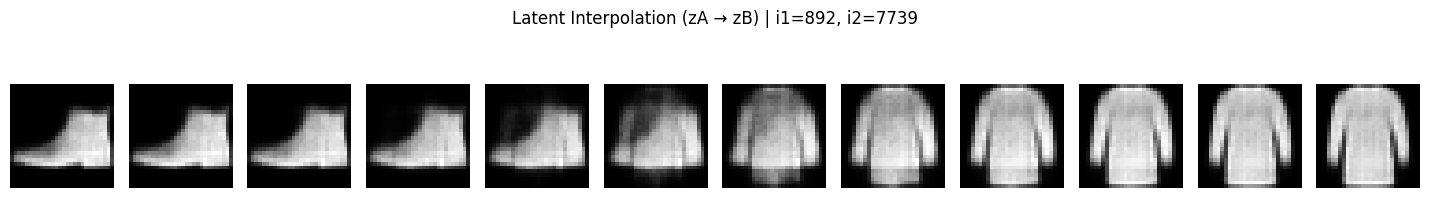

Saved: /kaggle/working/vae_outputs_v3/A_title_denoising.png


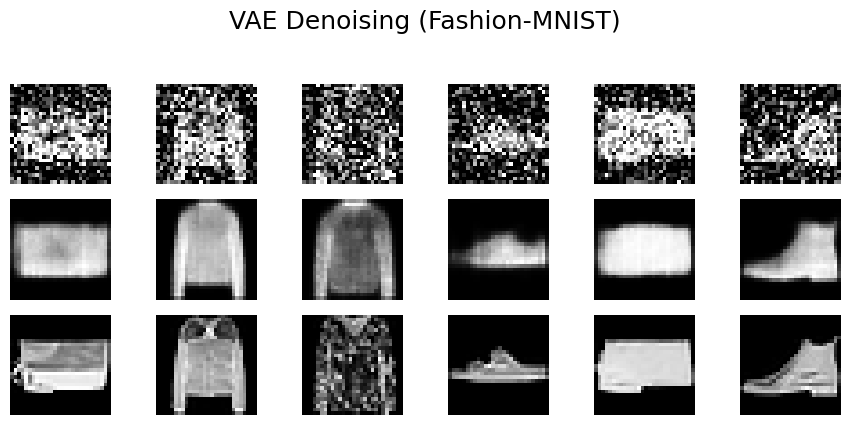

Saved: /kaggle/working/vae_outputs_v3/B_title_representation_learning.png


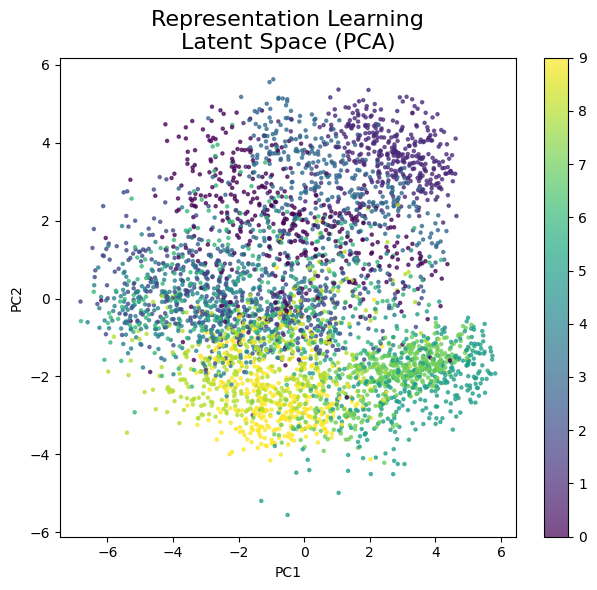

Saved: /kaggle/working/vae_outputs_v3/C_title_generation.png


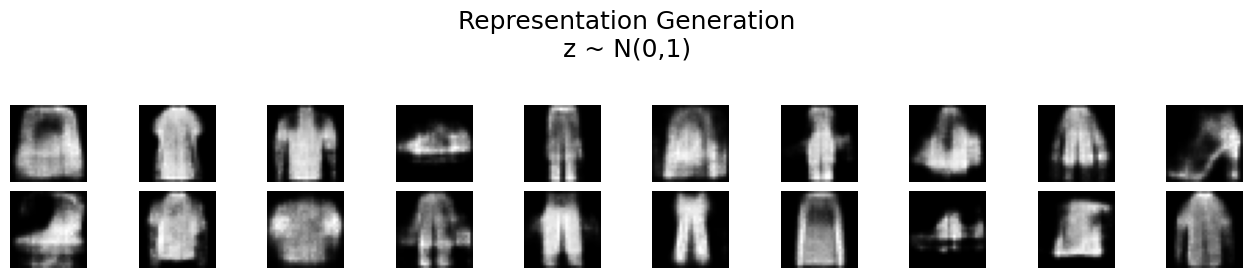

Saved: /kaggle/working/vae_outputs_v3/D_title_interpolation.png


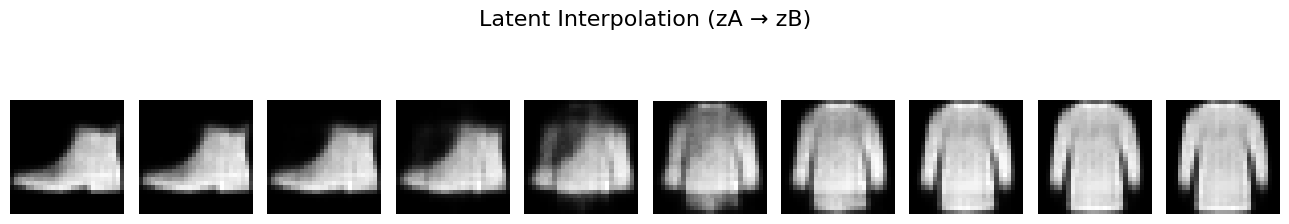


✅ Done. Saved files:
- 01_train_total_loss.png
- 02_train_recon_loss.png
- 03B_train_supcon_loss.png
- 03_train_kl_loss.png
- 04_beta_warmup.png
- 05_denoising_grid.png
- 06A_latent_pca_numbers.png
- 06B_latent_pca_text_tr.png
- 06C_latent_umap_text_tr.png
- 07_generated_prior.png
- 08_latent_interpolation.png
- A_title_denoising.png
- B_title_representation_learning.png
- C_title_generation.png
- D_title_interpolation.png
- history.csv
- metrics.csv
- metrics.txt
- pca_explained_variance.txt

NOT: 'Hiç overlap olmasın' 2D projeksiyonda matematiksel garanti değil.
Bu hücrede overlap'ı azaltmak için modele SupCon (etiketli ayrıştırma) eklendi,
ve daha ayrık görünüm için UMAP/t-SNE görselleri üretildi.


In [1]:
# ==========================================================
# Faster + Better VAE Denoising + Representation (Fashion-MNIST)
# + Latent Class Separation (Supervised Contrastive Loss on z_mean)
# Kaggle single-cell runnable
# Outputs: /kaggle/working/vae_outputs_v3
# ==========================================================

# (Opsiyonel) UMAP için - Kaggle'da çoğu zaman çalışır. İstemiyorsan kapat.
try:
    import umap  # noqa
except:
    !pip -q install umap-learn

import os, struct, csv, math, time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("TensorFlow:", tf.__version__)

# -------------------------
# SEED
# -------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# -------------------------
# SPEED FLAGS: XLA + Mixed Precision
# -------------------------
gpus = tf.config.list_physical_devices("GPU")
print("GPUs:", gpus)

try:
    tf.config.optimizer.set_jit(True)
    print("XLA: enabled")
except Exception as e:
    print("XLA enable failed:", e)

USE_MIXED = len(gpus) > 0
try:
    from tensorflow.keras import mixed_precision
    if USE_MIXED:
        mixed_precision.set_global_policy("mixed_float16")
        print("Mixed precision:", mixed_precision.global_policy())
    else:
        mixed_precision.set_global_policy("float32")
        print("Mixed precision: disabled (no GPU) ->", mixed_precision.global_policy())
except Exception as e:
    print("Mixed precision set failed:", e)

# -------------------------
# PATHS
# -------------------------
DATA_DIR = "/kaggle/input/fashionmnist"
OUT_DIR = "/kaggle/working/vae_outputs_v3"
os.makedirs(OUT_DIR, exist_ok=True)
print("Outputs will be saved to:", OUT_DIR)

def savefig(path, dpi=200):
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    print("Saved:", path)

# -------------------------
# DATASET: IDX okuma (Fashion-MNIST)
# -------------------------
def load_idx_images(path):
    with open(path, "rb") as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Invalid magic number {magic} in {path}")
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_idx_labels(path):
    with open(path, "rb") as f:
        magic, num = struct.unpack(">II", f.read(8))
        if magic != 2049:
            raise ValueError(f"Invalid magic number {magic} in {path}")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images_path = os.path.join(DATA_DIR, "train-images-idx3-ubyte")
train_labels_path = os.path.join(DATA_DIR, "train-labels-idx1-ubyte")
test_images_path  = os.path.join(DATA_DIR, "t10k-images-idx3-ubyte")
test_labels_path  = os.path.join(DATA_DIR, "t10k-labels-idx1-ubyte")

x_train = load_idx_images(train_images_path)
y_train = load_idx_labels(train_labels_path)
x_test  = load_idx_images(test_images_path)
y_test  = load_idx_labels(test_labels_path)

# Normalize + channel
x_train = (x_train.astype("float32") / 255.0)[..., None]
x_test  = (x_test.astype("float32")  / 255.0)[..., None]

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

# -------------------------
# DENOISING: Gaussian noise
# -------------------------
def add_gaussian_noise(x, noise_factor=0.45):
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=1.0, seed=SEED, dtype=tf.float32)
    x = tf.convert_to_tensor(x, dtype=tf.float32)
    x_noisy = tf.clip_by_value(x + noise_factor * noise, 0.0, 1.0)
    return x_noisy

NOISE_FACTOR = 0.45
x_train_noisy = add_gaussian_noise(x_train, NOISE_FACTOR)
x_test_noisy  = add_gaussian_noise(x_test,  NOISE_FACTOR)

# -------------------------
# TF.DATA pipeline (LABEL DAHİL)
# -------------------------
BATCH_SIZE = 256
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    tf.data.Dataset.from_tensor_slices((x_train_noisy, x_train, y_train))
    .shuffle(20000, seed=SEED)
    .batch(BATCH_SIZE, drop_remainder=True)
    .cache()
    .prefetch(AUTOTUNE)
)

test_ds = (
    tf.data.Dataset.from_tensor_slices((x_test_noisy, x_test, y_test))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTOTUNE)
)

# -------------------------
# MODEL: Stronger VAE
# -------------------------
LATENT_DIM = 16

class Sampling(layers.Layer):
    # mixed precision dtype uyumu için eps'i input dtype'ında üret
    def call(self, inputs):
        z_mean, z_log_var = inputs
        dtype = z_mean.dtype
        eps = tf.random.normal(tf.shape(z_mean), seed=SEED, dtype=dtype)
        return z_mean + tf.exp(0.5 * z_log_var) * eps

    def compute_output_shape(self, input_shape):
        return input_shape[0]

def conv_block(x, filters, k=3, s=1):
    x = layers.Conv2D(filters, k, strides=s, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    return x

def deconv_block(x, filters, k=3, s=2):
    x = layers.Conv2DTranspose(filters, k, strides=s, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)
    return x

def build_encoder(latent_dim=LATENT_DIM):
    inp = keras.Input(shape=(28, 28, 1), name="encoder_input")
    x = conv_block(inp, 32, 3, 2)   # 14x14
    x = conv_block(x, 64, 3, 2)     # 7x7
    x = conv_block(x, 128, 3, 1)
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.1)(x)

    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling(name="sampling")([z_mean, z_log_var])
    return keras.Model(inp, [z_mean, z_log_var, z], name="encoder")

def build_decoder(latent_dim=LATENT_DIM):
    inp = keras.Input(shape=(latent_dim,), name="decoder_input")
    x = layers.Dense(7 * 7 * 128)(inp)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((7, 7, 128))(x)
    x = deconv_block(x, 64, 3, 2)   # 14x14
    x = deconv_block(x, 32, 3, 2)   # 28x28
    x = layers.Conv2D(16, 3, padding="same")(x)
    x = layers.LeakyReLU()(x)

    # output float32 for numeric stability with mixed precision
    out = layers.Conv2D(1, 3, padding="same", activation="sigmoid", dtype="float32")(x)
    return keras.Model(inp, out, name="decoder")

encoder = build_encoder(LATENT_DIM)
decoder = build_decoder(LATENT_DIM)

encoder.summary()
decoder.summary()

# -------------------------
# LOSS: Reconstruction (BCE) + KL
# -------------------------
@tf.function
def recon_loss_bce(x_true, x_pred):
    bce = keras.backend.binary_crossentropy(x_true, x_pred)  # (B,28,28)
    return tf.reduce_mean(tf.reduce_sum(bce, axis=[1, 2]))

@tf.function
def kl_divergence(z_mean, z_log_var):
    z_mean = tf.cast(z_mean, tf.float32)
    z_log_var = tf.cast(z_log_var, tf.float32)
    return -0.5 * tf.reduce_mean(tf.reduce_sum(
        1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
    ))

# -------------------------
# SUPERVISED CONTRASTIVE LOSS (Latent ayrıştırma)
# -------------------------
@tf.function
def supervised_contrastive_loss(z, y, temperature=0.2):
    """
    z: (B, D) latent mean
    y: (B,) int labels
    """
    z = tf.cast(z, tf.float32)
    z = tf.math.l2_normalize(z, axis=1)

    y = tf.cast(y, tf.int32)
    y = tf.reshape(y, [-1, 1])
    mask = tf.cast(tf.equal(y, tf.transpose(y)), tf.float32)  # (B,B)

    logits = tf.matmul(z, z, transpose_b=True) / temperature

    bsz = tf.shape(z)[0]
    logits_mask = tf.ones_like(mask) - tf.eye(bsz)
    mask = mask * logits_mask

    logits = logits - tf.reduce_max(logits, axis=1, keepdims=True)
    exp_logits = tf.exp(logits) * logits_mask
    log_prob = logits - tf.math.log(tf.reduce_sum(exp_logits, axis=1, keepdims=True) + 1e-12)

    mean_log_prob_pos = tf.reduce_sum(mask * log_prob, axis=1) / (tf.reduce_sum(mask, axis=1) + 1e-12)
    return -tf.reduce_mean(mean_log_prob_pos)

# -------------------------
# BETA WARMUP
# -------------------------
class BetaWarmup(keras.callbacks.Callback):
    def __init__(self, beta_max=1.0, warmup_epochs=8):
        super().__init__()
        self.beta_max = beta_max
        self.warmup_epochs = warmup_epochs

    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.warmup_epochs:
            beta = self.beta_max * (epoch + 1) / self.warmup_epochs
        else:
            beta = self.beta_max
        self.model.beta.assign(beta)

# -------------------------
# VAE MODEL (Recon + KL + SupCon)
# -------------------------
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta_max=1.0, gamma_sc=1.0, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = tf.Variable(0.0, trainable=False, dtype=tf.float32)
        self.beta_max = beta_max
        self.gamma_sc = tf.Variable(gamma_sc, trainable=False, dtype=tf.float32)

        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.sc_loss_tracker = keras.metrics.Mean(name="supcon_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.recon_loss_tracker, self.kl_loss_tracker, self.sc_loss_tracker]

    def train_step(self, data):
        x_noisy, x_clean, y = data
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(x_noisy, training=True)
            x_recon = self.decoder(z, training=True)

            r_loss = recon_loss_bce(x_clean, x_recon)
            k_loss = kl_divergence(z_mean, z_log_var)
            sc_loss = supervised_contrastive_loss(z_mean, y, temperature=0.2)

            total = r_loss + self.beta * k_loss + self.gamma_sc * sc_loss

        grads = tape.gradient(total, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total)
        self.recon_loss_tracker.update_state(r_loss)
        self.kl_loss_tracker.update_state(k_loss)
        self.sc_loss_tracker.update_state(sc_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "supcon_loss": self.sc_loss_tracker.result(),
            "beta": self.beta,
            "gamma_sc": self.gamma_sc
        }

    def test_step(self, data):
        x_noisy, x_clean, y = data
        z_mean, z_log_var, z = self.encoder(x_noisy, training=False)
        x_recon = self.decoder(z, training=False)

        r_loss = recon_loss_bce(x_clean, x_recon)
        k_loss = kl_divergence(z_mean, z_log_var)
        sc_loss = supervised_contrastive_loss(z_mean, y, temperature=0.2)

        total = r_loss + self.beta * k_loss + self.gamma_sc * sc_loss

        self.total_loss_tracker.update_state(total)
        self.recon_loss_tracker.update_state(r_loss)
        self.kl_loss_tracker.update_state(k_loss)
        self.sc_loss_tracker.update_state(sc_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "supcon_loss": self.sc_loss_tracker.result(),
            "beta": self.beta,
            "gamma_sc": self.gamma_sc
        }

# -------------------------
# TRAIN
# -------------------------
EPOCHS = 20
GAMMA_SC = 1.0       # sınıf ayrıştırma gücü (0.3–1.5 iyi başlangıç)
BETA_MAX = 1.0
WARMUP_EPOCHS = 8

vae = VAE(encoder, decoder, beta_max=BETA_MAX, gamma_sc=GAMMA_SC)
vae.compile(optimizer=keras.optimizers.Adam(1e-3))

callbacks = [
    BetaWarmup(beta_max=BETA_MAX, warmup_epochs=WARMUP_EPOCHS),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1),
]

t0 = time.time()
history = vae.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)
print("Training time (s):", round(time.time() - t0, 2))

# -------------------------
# TRAINING CURVES + CSV
# -------------------------
def plot_history(hist):
    h = hist.history
    def safe_get(k): return h[k] if k in h else []
    epochs = np.arange(1, len(safe_get("loss")) + 1)

    plt.figure(figsize=(7,4))
    plt.plot(epochs, safe_get("loss"), label="train_loss")
    if len(safe_get("val_loss")): plt.plot(epochs, safe_get("val_loss"), label="val_loss")
    plt.title("Training Curve - Total Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    savefig(os.path.join(OUT_DIR, "01_train_total_loss.png"))
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(epochs, safe_get("recon_loss"), label="train_recon")
    if len(safe_get("val_recon_loss")): plt.plot(epochs, safe_get("val_recon_loss"), label="val_recon")
    plt.title("Training Curve - Recon Loss")
    plt.xlabel("Epoch"); plt.ylabel("Recon"); plt.legend()
    savefig(os.path.join(OUT_DIR, "02_train_recon_loss.png"))
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(epochs, safe_get("kl_loss"), label="train_kl")
    if len(safe_get("val_kl_loss")): plt.plot(epochs, safe_get("val_kl_loss"), label="val_kl")
    plt.title("Training Curve - KL Loss")
    plt.xlabel("Epoch"); plt.ylabel("KL"); plt.legend()
    savefig(os.path.join(OUT_DIR, "03_train_kl_loss.png"))
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(epochs, safe_get("supcon_loss"), label="train_supcon")
    if len(safe_get("val_supcon_loss")): plt.plot(epochs, safe_get("val_supcon_loss"), label="val_supcon")
    plt.title("Training Curve - SupCon Loss (Latent Separation)")
    plt.xlabel("Epoch"); plt.ylabel("SupCon"); plt.legend()
    savefig(os.path.join(OUT_DIR, "03B_train_supcon_loss.png"))
    plt.show()

    if "beta" in h:
        plt.figure(figsize=(7,3.5))
        plt.plot(epochs, safe_get("beta"), label="beta")
        plt.title("KL Weight (Beta) Warmup")
        plt.xlabel("Epoch"); plt.ylabel("Beta"); plt.legend()
        savefig(os.path.join(OUT_DIR, "04_beta_warmup.png"))
        plt.show()

plot_history(history)

hist_csv = os.path.join(OUT_DIR, "history.csv")
with open(hist_csv, "w", newline="") as f:
    writer = csv.writer(f)
    keys = list(history.history.keys())
    writer.writerow(["epoch"] + keys)
    for i in range(len(history.history[keys[0]])):
        writer.writerow([i+1] + [history.history[k][i] for k in keys])
print("Saved:", hist_csv)

# -------------------------
# DENOISING GRID
# -------------------------
def show_denoising_examples(n=10, seed=SEED, fname="05_denoising_grid.png"):
    rng = np.random.default_rng(seed)
    idx = rng.choice(len(x_test), size=n, replace=False)

    xN = tf.gather(x_test_noisy, idx)
    xC = tf.gather(x_test, idx)

    z_mean, z_log_var, z = encoder(xN, training=False)
    xR = decoder(z, training=False)

    plt.figure(figsize=(n*1.8, 5))
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        plt.imshow(xN[i, :, :, 0], cmap="gray"); plt.axis("off")
        if i == 0: ax.set_title("Noisy")

        ax = plt.subplot(3, n, i+1+n)
        plt.imshow(xR[i, :, :, 0], cmap="gray"); plt.axis("off")
        if i == 0: ax.set_title("VAE Recon")

        ax = plt.subplot(3, n, i+1+2*n)
        plt.imshow(xC[i, :, :, 0], cmap="gray"); plt.axis("off")
        if i == 0: ax.set_title("Clean")

    plt.suptitle("VAE Denoising (Fashion-MNIST)", y=1.02, fontsize=16)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

show_denoising_examples(10)

# -------------------------
# METRICS: MSE / PSNR / SSIM
# -------------------------
def mse(a, b):
    a = tf.cast(a, tf.float32); b = tf.cast(b, tf.float32)
    return tf.reduce_mean(tf.square(a - b))

def mean_psnr(a, b):
    a = tf.cast(a, tf.float32); b = tf.cast(b, tf.float32)
    return tf.reduce_mean(tf.image.psnr(a, b, max_val=1.0))

def mean_ssim(a, b):
    a = tf.cast(a, tf.float32); b = tf.cast(b, tf.float32)
    return tf.reduce_mean(tf.image.ssim(a, b, max_val=1.0))

all_noisy = x_test_noisy
all_clean = x_test

z_mean_all, z_log_var_all, z_all = encoder(all_noisy, training=False)
all_recon = decoder(z_all, training=False)

mse_noisy = float(mse(all_noisy, all_clean).numpy())
mse_vae   = float(mse(all_recon, all_clean).numpy())

psnr_noisy = float(mean_psnr(all_noisy, all_clean).numpy())
psnr_vae   = float(mean_psnr(all_recon, all_clean).numpy())

ssim_noisy = float(mean_ssim(all_noisy, all_clean).numpy())
ssim_vae   = float(mean_ssim(all_recon, all_clean).numpy())

mse_improve_pct = (mse_noisy - mse_vae) / (mse_noisy + 1e-12) * 100.0
psnr_gain = psnr_vae - psnr_noisy
ssim_gain = ssim_vae - ssim_noisy

print("\n=== Denoising Metrics (Test) ===")
print(f"NOISE_FACTOR={NOISE_FACTOR} | LATENT_DIM={LATENT_DIM} | BATCH={BATCH_SIZE} | EPOCHS={EPOCHS}")
print(f"Baseline (Noisy->Clean)  MSE={mse_noisy:.6f} | PSNR={psnr_noisy:.3f} dB | SSIM={ssim_noisy:.4f}")
print(f"VAE (Recon->Clean)       MSE={mse_vae:.6f} | PSNR={psnr_vae:.3f} dB | SSIM={ssim_vae:.4f}")
print("\n=== Improvement (Higher is better) ===")
print(f"MSE improvement: {mse_improve_pct:.2f}% (↓)")
print(f"PSNR gain      : {psnr_gain:.3f} dB (↑)")
print(f"SSIM gain      : {ssim_gain:.4f} (↑)")

metrics_txt = os.path.join(OUT_DIR, "metrics.txt")
with open(metrics_txt, "w") as f:
    f.write("=== Denoising Metrics (Test) ===\n")
    f.write(f"NOISE_FACTOR={NOISE_FACTOR}\nLATENT_DIM={LATENT_DIM}\nBATCH_SIZE={BATCH_SIZE}\nEPOCHS={EPOCHS}\n\n")
    f.write(f"Baseline (Noisy->Clean)  MSE={mse_noisy:.6f} | PSNR={psnr_noisy:.3f} dB | SSIM={ssim_noisy:.4f}\n")
    f.write(f"VAE (Recon->Clean)       MSE={mse_vae:.6f} | PSNR={psnr_vae:.3f} dB | SSIM={ssim_vae:.4f}\n\n")
    f.write("=== Improvement ===\n")
    f.write(f"MSE improvement: {mse_improve_pct:.2f}%\n")
    f.write(f"PSNR gain      : {psnr_gain:.3f} dB\n")
    f.write(f"SSIM gain      : {ssim_gain:.4f}\n")
print("Saved:", metrics_txt)

metrics_csv = os.path.join(OUT_DIR, "metrics.csv")
with open(metrics_csv, "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(["metric", "baseline_noisy_to_clean", "vae_recon_to_clean", "delta_or_improvement"])
    w.writerow(["MSE",  mse_noisy,  mse_vae,  mse_improve_pct])
    w.writerow(["PSNR_dB", psnr_noisy, psnr_vae, psnr_gain])
    w.writerow(["SSIM", ssim_noisy, ssim_vae, ssim_gain])
print("Saved:", metrics_csv)

# -------------------------
# REPRESENTATION LEARNING: 2D PLOTS (PCA + UMAP + t-SNE)
# -------------------------
FASHION_LABELS_TR = {
    0: "Tişört / Üst",
    1: "Pantolon",
    2: "Kazak",
    3: "Elbise",
    4: "Mont / Kaban",
    5: "Sandalet",
    6: "Gömlek",
    7: "Spor Ayakkabı",
    8: "Çanta",
    9: "Bot"
}

def plot_latent_pca_tr(N_VIS=8000, use_noisy=True,
                       fnameA="06A_latent_pca_numbers.png",
                       fnameB="06B_latent_pca_text_tr.png"):
    y_vis = y_test[:N_VIS]
    x_for_latent = x_test_noisy[:N_VIS] if use_noisy else x_test[:N_VIS]

    z_mean_vis, _, _ = encoder(tf.convert_to_tensor(x_for_latent, dtype=tf.float32), training=False)
    z_mean_vis = z_mean_vis.numpy()

    pca = PCA(n_components=2, random_state=SEED)
    z2 = pca.fit_transform(z_mean_vis)

    # (A) numbers
    plt.figure(figsize=(9,7))
    sc = plt.scatter(z2[:,0], z2[:,1], c=y_vis, s=6, alpha=0.25)
    plt.colorbar(sc, ticks=range(10))
    plt.title("Latent Space (z_mean) - PCA 2D (Label: 0-9)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    savefig(os.path.join(OUT_DIR, fnameA))
    plt.show()

    # (B) TR labels + centroid text
    plt.figure(figsize=(9,7))
    sc2 = plt.scatter(z2[:,0], z2[:,1], c=y_vis, s=6, alpha=0.20)
    cbar2 = plt.colorbar(sc2, ticks=range(10))
    cbar2.ax.set_yticklabels([f"{i} - {FASHION_LABELS_TR[i]}" for i in range(10)])
    plt.title("Latent Space (z_mean) - PCA 2D (Türkçe Sınıf Adları)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    for cls in range(10):
        mask = (y_vis == cls)
        if np.sum(mask) == 0:
            continue
        cx = np.mean(z2[mask, 0]); cy = np.mean(z2[mask, 1])
        plt.text(cx, cy, f"{cls}: {FASHION_LABELS_TR[cls]}",
                 fontsize=10, fontweight="bold",
                 ha="center", va="center",
                 bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="black", alpha=0.85))

    savefig(os.path.join(OUT_DIR, fnameB))
    plt.show()

    # explained variance
    pca_txt = os.path.join(OUT_DIR, "pca_explained_variance.txt")
    with open(pca_txt, "w") as f:
        f.write("PCA Explained Variance Ratio (2 components)\n")
        f.write(str(pca.explained_variance_ratio_) + "\n")
        f.write("Sum: " + str(np.sum(pca.explained_variance_ratio_)) + "\n")
    print("Saved:", pca_txt)

def plot_latent_umap_or_tsne(N_VIS=8000, use_noisy=True,
                            fname_umap="06C_latent_umap_text_tr.png",
                            fname_tsne="06D_latent_tsne_text_tr.png"):
    y_vis = y_test[:N_VIS]
    x_for_latent = x_test_noisy[:N_VIS] if use_noisy else x_test[:N_VIS]

    z_mean_vis, _, _ = encoder(tf.convert_to_tensor(x_for_latent, dtype=tf.float32), training=False)
    z_mean_vis = z_mean_vis.numpy()

    # UMAP (varsa)
    try:
        import umap
        reducer = umap.UMAP(n_components=2, random_state=SEED, n_neighbors=25, min_dist=0.05)
        z2 = reducer.fit_transform(z_mean_vis)

        plt.figure(figsize=(9,7))
        sc = plt.scatter(z2[:,0], z2[:,1], c=y_vis, s=6, alpha=0.35)
        cbar = plt.colorbar(sc, ticks=range(10))
        cbar.ax.set_yticklabels([f"{i} - {FASHION_LABELS_TR[i]}" for i in range(10)])
        plt.title("Latent Space (z_mean) - UMAP 2D (Türkçe Sınıf Adları)")
        plt.xlabel("UMAP1"); plt.ylabel("UMAP2")

        for cls in range(10):
            m = (y_vis == cls)
            cx, cy = np.mean(z2[m,0]), np.mean(z2[m,1])
            plt.text(cx, cy, f"{cls}: {FASHION_LABELS_TR[cls]}",
                     fontsize=10, fontweight="bold",
                     ha="center", va="center",
                     bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="black", alpha=0.85))

        savefig(os.path.join(OUT_DIR, fname_umap))
        plt.show()
        return
    except Exception as e:
        print("UMAP not available -> t-SNE fallback. Reason:", e)

    tsne = TSNE(n_components=2, perplexity=35, learning_rate="auto", init="pca", random_state=SEED)
    z2 = tsne.fit_transform(z_mean_vis)

    plt.figure(figsize=(9,7))
    sc = plt.scatter(z2[:,0], z2[:,1], c=y_vis, s=6, alpha=0.35)
    cbar = plt.colorbar(sc, ticks=range(10))
    cbar.ax.set_yticklabels([f"{i} - {FASHION_LABELS_TR[i]}" for i in range(10)])
    plt.title("Latent Space (z_mean) - t-SNE 2D (Türkçe Sınıf Adları)")
    plt.xlabel("tSNE1"); plt.ylabel("tSNE2")

    for cls in range(10):
        m = (y_vis == cls)
        cx, cy = np.mean(z2[m,0]), np.mean(z2[m,1])
        plt.text(cx, cy, f"{cls}: {FASHION_LABELS_TR[cls]}",
                 fontsize=10, fontweight="bold",
                 ha="center", va="center",
                 bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="black", alpha=0.85))

    savefig(os.path.join(OUT_DIR, fname_tsne))
    plt.show()

plot_latent_pca_tr(N_VIS=8000, use_noisy=True)
plot_latent_umap_or_tsne(N_VIS=8000, use_noisy=True)

# -------------------------
# GENERATION: Prior sampling
# -------------------------
def sample_from_prior(n=30, seed=SEED, fname="07_generated_prior.png"):
    z = tf.random.normal(shape=(n, LATENT_DIM), seed=seed, dtype=tf.float32)
    x_gen = decoder(tf.cast(z, tf.float32), training=False).numpy()

    cols = 10
    rows = int(math.ceil(n/cols))
    plt.figure(figsize=(cols*1.2, rows*1.2))
    for i in range(n):
        ax = plt.subplot(rows, cols, i+1)
        plt.imshow(x_gen[i,:,:,0], cmap="gray"); plt.axis("off")
    plt.suptitle("Generated Samples (Prior ~ N(0,1))", y=1.02)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

sample_from_prior(30)

# -------------------------
# GENERATION: Latent interpolation (z_mean)
# -------------------------
def latent_interpolation(steps=12, seed=SEED, fname="08_latent_interpolation.png"):
    rng = np.random.default_rng(seed)
    i1, i2 = rng.integers(0, len(x_test), size=2)

    xA = x_test_noisy[i1:i1+1]
    xB = x_test_noisy[i2:i2+1]

    zA_mean, _, _ = encoder(xA, training=False)
    zB_mean, _, _ = encoder(xB, training=False)

    alphas = np.linspace(0, 1, steps).astype("float32")
    z_interp = tf.concat([(1-a)*zA_mean + a*zB_mean for a in alphas], axis=0)

    x_interp = decoder(z_interp, training=False).numpy()

    plt.figure(figsize=(steps*1.2, 1.7))
    for i in range(steps):
        ax = plt.subplot(1, steps, i+1)
        plt.imshow(x_interp[i,:,:,0], cmap="gray"); plt.axis("off")
    plt.suptitle(f"Latent Interpolation (zA → zB) | i1={i1}, i2={i2}", y=1.15)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()
    return int(i1), int(i2)

i1, i2 = latent_interpolation()

# -------------------------
# TITLE PANELS (A/B/C/D)
# -------------------------
def title_panel_denoising(n=6, fname="A_title_denoising.png"):
    idx = np.random.default_rng(SEED).choice(len(x_test), n, replace=False)
    xN = tf.gather(x_test_noisy, idx)
    xC = tf.gather(x_test, idx)
    _, _, z = encoder(xN, training=False)
    xR = decoder(z, training=False)

    plt.figure(figsize=(n*1.5, 4))
    for i in range(n):
        plt.subplot(3, n, i+1)
        plt.imshow(xN[i,:,:,0], cmap="gray"); plt.axis("off")
        if i == 0: plt.ylabel("Noisy", fontsize=12)

        plt.subplot(3, n, i+1+n)
        plt.imshow(xR[i,:,:,0], cmap="gray"); plt.axis("off")
        if i == 0: plt.ylabel("VAE", fontsize=12)

        plt.subplot(3, n, i+1+2*n)
        plt.imshow(xC[i,:,:,0], cmap="gray"); plt.axis("off")
        if i == 0: plt.ylabel("Clean", fontsize=12)

    plt.suptitle("VAE Denoising (Fashion-MNIST)", fontsize=18, y=1.05)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

def title_panel_representation(fname="B_title_representation_learning.png", N=4000):
    z_mean, _, _ = encoder(x_test[:N], training=False)
    z_mean = z_mean.numpy()

    pca = PCA(n_components=2, random_state=SEED)
    z2 = pca.fit_transform(z_mean)

    plt.figure(figsize=(6.5,6.0))
    sc = plt.scatter(z2[:,0], z2[:,1], c=y_test[:N], s=5, alpha=0.7)
    plt.colorbar(sc, ticks=range(10))
    plt.title("Representation Learning\nLatent Space (PCA)", fontsize=16)
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

def title_panel_generation(n=20, fname="C_title_generation.png"):
    z = tf.random.normal((n, LATENT_DIM), seed=SEED, dtype=tf.float32)
    x_gen = decoder(z, training=False).numpy()

    cols = 10
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(cols*1.3, rows*1.3))
    for i in range(n):
        plt.subplot(rows, cols, i+1)
        plt.imshow(x_gen[i,:,:,0], cmap="gray"); plt.axis("off")

    plt.suptitle("Representation Generation\nz ~ N(0,1)", fontsize=18, y=1.05)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

def title_panel_interpolation(steps=10, fname="D_title_interpolation.png"):
    i1, i2 = np.random.default_rng(SEED).choice(len(x_test), 2, replace=False)

    zA_mean, _, _ = encoder(x_test_noisy[i1:i1+1], training=False)
    zB_mean, _, _ = encoder(x_test_noisy[i2:i2+1], training=False)

    alphas = np.linspace(0, 1, steps).astype("float32")
    z_interp = tf.concat([(1-a)*zA_mean + a*zB_mean for a in alphas], axis=0)
    x_interp = decoder(z_interp, training=False).numpy()

    plt.figure(figsize=(steps*1.3, 2.0))
    for i in range(steps):
        plt.subplot(1, steps, i+1)
        plt.imshow(x_interp[i,:,:,0], cmap="gray"); plt.axis("off")

    plt.suptitle("Latent Interpolation (zA → zB)", fontsize=16, y=1.15)
    plt.tight_layout()
    savefig(os.path.join(OUT_DIR, fname))
    plt.show()

title_panel_denoising()
title_panel_representation()
title_panel_generation()
title_panel_interpolation()

print("\n✅ Done. Saved files:")
for fn in sorted(os.listdir(OUT_DIR)):
    print("-", fn)

print("\nNOT: 'Hiç overlap olmasın' 2D projeksiyonda matematiksel garanti değil.")
print("Bu hücrede overlap'ı azaltmak için modele SupCon (etiketli ayrıştırma) eklendi,")
print("ve daha ayrık görünüm için UMAP/t-SNE görselleri üretildi.")
